<a href="https://colab.research.google.com/github/canast07/EPL448-Ticket-price/blob/canast07/tempEPL448.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#reg = LinearRegression()

In [303]:
trainData = pd.read_excel("Data_Train.xlsx")
testData = pd.read_excel("Test_set.xlsx")
sampData = pd.read_excel("Sample_submission.xlsx")

trainData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [304]:
print(trainData.shape , testData.shape)

(10683, 11) (2671, 10)


In [305]:
trainData.isnull().sum() # check for nulls

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [306]:
trainData.dropna(inplace=True) # Drop the rows that have null fields
print(trainData.isnull().sum())
trainData.dtypes # check the types

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Split the date into dd, mm, yy

In [307]:
trainData['Day'] = trainData['Date_of_Journey'].str.split('/').str[0]
trainData['Month'] = trainData['Date_of_Journey'].str.split('/').str[1]
trainData['Year'] = trainData['Date_of_Journey'].str.split('/').str[2]
trainData["Day"]= trainData["Day"].astype('int64')
trainData["Month"]= trainData["Month"].astype('int64')
trainData["Month"]= trainData["Month"].astype('int64')
trainData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [308]:
trainData.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Replace Airlines with numbers

In [309]:
trainData['Airline'] = trainData['Airline'].replace({'Jet Airways':'0', 
                                                             'IndiGo':'1' , 'Air India':'2', 'Multiple carriers':'3',
                                                             'SpiceJet':'4',  'Vistara':'5', 'Air Asia':'6',
                                                             'GoAir':'7', 'Multiple carriers Premium economy':'8',
                                                             'Jet Airways Business':'9', 'Vistara Premium economy':'10',
                                                             'Trujet':'11'})
trainData['Airline']= trainData['Airline'].astype('int64')
trainData.head() # Replace airlines with numbers

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,1,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,1,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Replace Total Stops with numbers

In [310]:
trainData['Total_Stops'] = trainData['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4
}) # replace total stops with numbers
trainData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,1,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,1,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


Replace Source with numbers

In [311]:
trainData.Source.unique()
trainData.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [312]:
trainData['Source'] = trainData['Source'].replace({'Delhi':'0','Kolkata':'1','Banglore':'2','Mumbai':'3','Chennai':'4'})
trainData['Source']= trainData['Source'].astype('int64')

Replace Destination with numbers

In [313]:
trainData.Destination.unique()
trainData.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [314]:
trainData['Destination'] = trainData['Destination'].replace({'Delhi':'0','Kolkata':'1','Banglore':'2','New Delhi':'3','Hyderabad':'4', 'Cochin':'5',})
trainData['Destination']= trainData['Destination'].astype('int64')

In [315]:
trainData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,24/03/2019,2,3,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,2,1/05/2019,1,2,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,0,9/06/2019,0,5,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,1,12/05/2019,1,2,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,1,01/03/2019,2,3,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


Change duration to mins

In [316]:
arr = np.empty((trainData['Duration'].count()))
trainData = trainData.reset_index(drop = True)
print(len(arr))
i = 0
for x in trainData['Duration']:
  # print("x", x)
  hours = 0
  minutes = 0
  if 'h' in str(x):
    tokens = str(x).split("h")
    hours = int(tokens[0]) * 60
    # print("hours = ", hours)
    if 'm' in str(x):
      temp = tokens[1].replace(' ', '').replace('m','')
      minutes = int(temp)
  else:
    temp = tokens[1].replace(' ', '').replace('m','')
    minutes = int(temp)
  time = hours + minutes
  arr[i] = time
  i += 1
  trainData['Duration'] = pd.Series(arr.astype(int))

10682


Change Additional Info to numbers

In [317]:
trainData.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [318]:
# Additional_Info has two No info and No Info values , change all to No info
trainData['Additional_Info'] = trainData['Additional_Info'].replace({'No Info':'No info'})
trainData.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [319]:
trainData['Additional_Info'] = trainData['Additional_Info'].replace({'No info':'0','In-flight meal not included':'1','No check-in baggage included':'2','1 Long layover':'3',
                                                                     'Change airports':'4','Business class':'5','Red-eye flight':'6','2 Long layover':'7','1 Short layover':'8'})
trainData['Additional_Info']= trainData['Additional_Info'].astype('int64')
trainData.Additional_Info.value_counts()

0    8347
1    1982
2     320
3      19
4       7
5       4
7       1
6       1
8       1
Name: Additional_Info, dtype: int64

In [320]:
#trainData['Dep_Time'] = trainData['Dep_Time'].astype('category')
#trainData['Dep_Time'] = trainData['Dep_Time'].cat.codes

Remove outliers

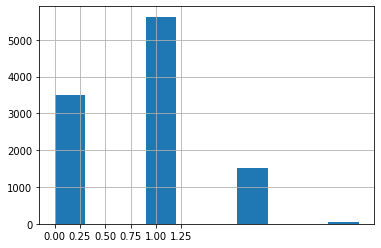

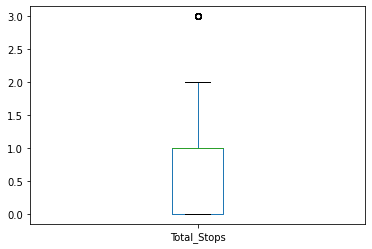

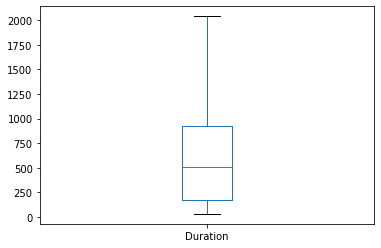

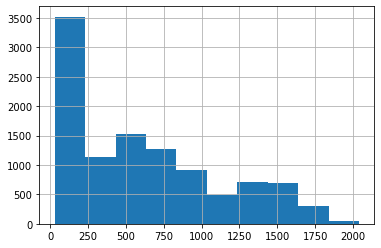

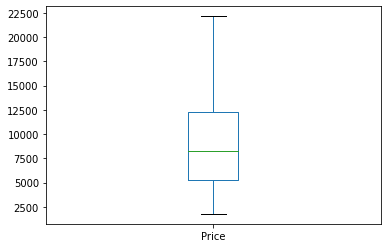

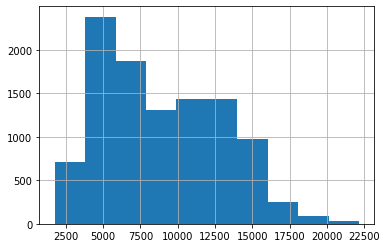

In [321]:
median = np.percentile(trainData.Total_Stops,50)  # median
std = trainData.Total_Stops.std() # standard deviation 
trainData = trainData.drop(trainData[ trainData.Total_Stops > (median+3*std)].index) # drop "outliers " that are > median + 3*std
trainData['Total_Stops'].hist()
plt.xticks([0.0,0.25,0.5,0.75,1.0, 1.25])
plt.show()
trainData['Total_Stops'].plot(kind='box', subplots=True)
plt.show()

# Remove outliers of Duration
median = np.percentile(trainData.Duration,50)  # median
std = trainData.Duration.std() # standard deviation 
trainData = trainData.drop(trainData[ trainData.Duration > (median+3*std)].index) # drop "outliers " that are > median + 3*std
trainData['Duration'].plot(kind='box', subplots=True)
plt.show()
trainData['Duration'].hist()
plt.show()

# Remove price outliers
median = np.percentile(trainData.Price,50)  # median
std = trainData.Price.std() # standard deviation 
trainData = trainData.drop(trainData[ trainData.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
trainData['Price'].plot(kind='box', subplots=True)
plt.show()
trainData['Price'].hist()
plt.show()

Airline             int64
Date_of_Journey    object
Source              int64
Destination         int64
Route              object
Dep_Time           object
Arrival_Time       object
Duration            int64
Total_Stops         int64
Additional_Info     int64
Price               int64
Day                 int64
Month               int64
Year               object
dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


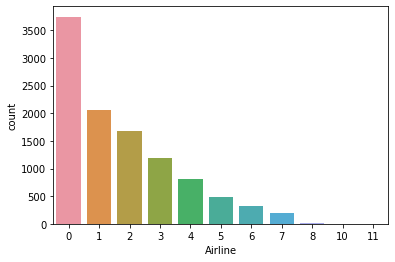

In [322]:
print(trainData.dtypes) # check that all the fields that we will need are integers
sns.countplot(trainData.Airline)

# **Preprocess Test Data**

In [323]:
testData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [324]:
trainData.isnull().sum() # check for nulls

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
dtype: int64

In [325]:
testData['Day'] = testData['Date_of_Journey'].str.split('/').str[0]
testData['Month'] = testData['Date_of_Journey'].str.split('/').str[1]
testData['Year'] = testData['Date_of_Journey'].str.split('/').str[2]
testData["Day"]= testData["Day"].astype('int64')
testData["Month"]= testData["Month"].astype('int64')
testData["Month"]= testData["Month"].astype('int64')
testData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [326]:
testData.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [327]:
testData['Airline'] = testData['Airline'].replace({'Jet Airways':'0', 
                                                             'IndiGo':'1' , 'Air India':'2', 'Multiple carriers':'3',
                                                             'SpiceJet':'4',  'Vistara':'5', 'Air Asia':'6',
                                                             'GoAir':'7', 'Multiple carriers Premium economy':'8',
                                                             'Jet Airways Business':'9', 'Vistara Premium economy':'10'})
testData['Airline']= testData['Airline'].astype('int64')


In [328]:
testData['Total_Stops'] = testData['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4
}) # replace total stops with numbers
testData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,0,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,2019
1,1,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,2019
2,0,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5,2019
3,3,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,2019
4,6,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6,2019


In [329]:
testData.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [330]:
testData['Additional_Info'] = testData['Additional_Info'].replace({'No info':'0','In-flight meal not included':'1','No check-in baggage included':'2','1 Long layover':'3',
                                                                     'Change airports':'4','Business class':'5'})
testData['Additional_Info']= testData['Additional_Info'].astype('int64')

In [331]:
testData.Source.unique()
testData.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [332]:
testData['Source'] = testData['Source'].replace({'Delhi':'0','Kolkata':'1','Banglore':'2','Mumbai':'3','Chennai':'4'})
testData['Source']= testData['Source'].astype('int64')

In [333]:
testData.Destination.unique()
testData.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [334]:
testData['Destination'] = testData['Destination'].replace({'Delhi':'0','Kolkata':'1','Banglore':'2','New Delhi':'3','Hyderabad':'4', 'Cochin':'5',})
testData['Destination']= testData['Destination'].astype('int64')

In [335]:
arr = np.empty((testData['Duration'].count()))
testData = testData.reset_index(drop = True)
print(len(arr))
i = 0
for x in testData['Duration']:
  # print("x", x)
  hours = 0
  minutes = 0
  if 'h' in str(x):
    tokens = str(x).split("h")
    hours = int(tokens[0]) * 60
    # print("hours = ", hours)
    if 'm' in str(x):
      temp = tokens[1].replace(' ', '').replace('m','')
      minutes = int(temp)
  else:
    temp = tokens[1].replace(' ', '').replace('m','')
    minutes = int(temp)
  time = hours + minutes
  arr[i] = time
  i += 1
  testData['Duration'] = pd.Series(arr.astype(int))

2671


In [336]:
testData = testData.drop(['Route', 'Date_of_Journey'], axis = 1)

In [337]:
testData.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,0,0,5,17:30,04:25 07 Jun,655,1,0,6,6,2019
1,1,1,2,06:20,10:20,240,1,0,12,5,2019
2,0,0,5,19:15,19:00 22 May,1425,1,1,21,5,2019
3,3,0,5,08:00,21:00,780,1,0,21,5,2019
4,6,2,0,23:55,02:45 25 Jun,170,0,0,24,6,2019


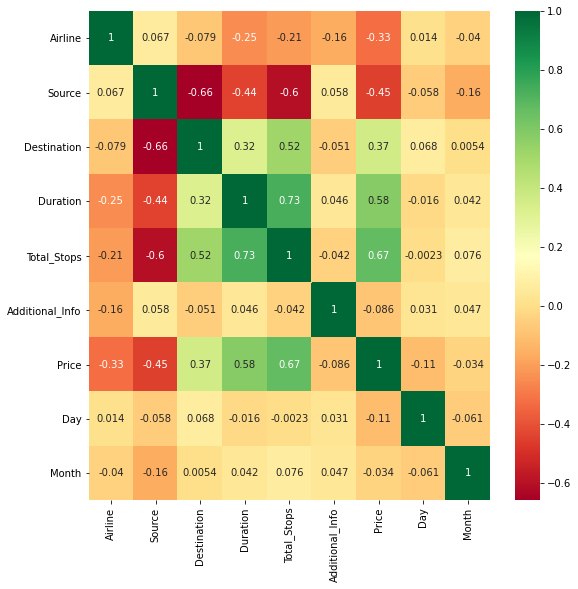

In [338]:
#print(trainData.corr())
plt.figure(figsize=(9,9))
sns.heatmap(trainData.corr(), annot=True, cmap='RdYlGn')

***** change dep and arr time to another type to check correletion *****

In [339]:
trainData.shape

(10490, 14)

In [340]:
x = trainData.drop(["Route", "Price", "Year", "Date_of_Journey","Dep_Time","Arrival_Time"], axis=1)
y = trainData.Price.values

In [341]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7421, 8) (7421,)
(3181, 8) (3181,)


### **Linear Regression**

In [342]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [343]:
reg.score(x_test,y_test)

0.404495443996038

In [344]:
y_pred = reg.predict(x_test)
print(y_pred)
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')

[11875.12760397 10744.26319503  5717.80387036 ...  5913.44658469
  5195.62851209  9740.23496132]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


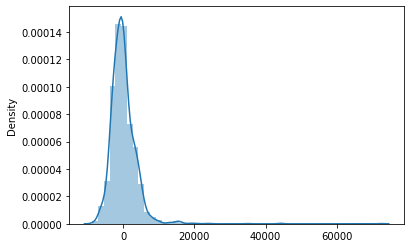

In [345]:
sns.distplot(y_test-y_pred)

In [346]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE:  2417.1878742944973
MSE:  13635626.627960663
RMSE:  49.1649049047641


In [347]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [348]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [349]:
clf.score(x_test,y_test)

0.8654832766564313

In [350]:
y_pred2 = clf.predict(x_test)

In [351]:
prediction2 = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction2.csv')